In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('meteo.csv')
df.tail()

,Unnamed: 0,index,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Maksymalna temperatura dobowa,Status pomiaru TMAX,Minimalna temperatura dobowa,...,Wystąpienie błyskawicy [0/1],Status pomiaru DZBL,Stan gruntu [Z/R],Izoterma dolna [cm],Status pomiaru IZD,Izoterma górna [cm],Status pomiaru IZG,Aktynometria [J/cm2],Status pomiaru AKTN,date
440064,440064,360,349220690,LESKO,2021,12,27,-5.2,NaN,-15.6,...,0,8.0,NaN,26,NaN,0,9.0,0,8.0,2021-12-27
440065,440065,361,349220690,LESKO,2021,12,28,-1.3,NaN,-8.9,...,0,8.0,NaN,28,NaN,0,9.0,0,8.0,2021-12-28
440066,440066,362,349220690,LESKO,2021,12,29,0.8,NaN,-5.9,...,0,8.0,NaN,29,NaN,0,9.0,0,8.0,2021-12-29
440067,440067,363,349220690,LESKO,2021,12,30,3.4,NaN,0.0,...,0,8.0,NaN,28,NaN,4,NaN,0,8.0,2021-12-30
440068,440068,364,349220690,LESKO,2021,12,31,5.7,NaN,1.4,...,0,8.0,NaN,29,NaN,4,NaN,0,8.0,2021-12-31


In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc',
       'Dzień', 'Maksymalna temperatura dobowa', 'Status pomiaru TMAX',
       'Minimalna temperatura dobowa', 'Status pomiaru TMIN',
       'Średnia temperatura dobowa', 'Status pomiaru STD',
       'Temperatura minimalna przy gruncie', 'Status pomiaru TMNG',
       'Suma dobowa opadu [mm]', 'Status pomiaru SMDB', 'Rodzaj opadu [S/W/ ]',
       'Wysokość pokrywy śnieżnej [cm]', 'Status pomiaru PKSN',
       'Równoważnik wodny śniegu  [mm/cm]', 'Status pomiaru RWSN',
       'Usłonecznienie [godziny]', 'Status pomiaru USL',
       'Czas trwania opadu deszczu [godziny]', 'Status pomiaru DESZ',
       'Czas trwania opadu śniegu [godziny]', 'Status pomiaru SNEG',
       'Czas trwania opadu deszczu ze śniegiem [godziny]',
       'Status pomiaru DISN', 'Czas trwania gradu [godziny]',
       'Status pomiaru GRAD', 'Czas trwania mgły [godziny]',
       'Status pomiaru MGLA', 'Czas trwania zamglenia  [godziny]',
     

In [4]:
df['Nazwa stacji'].unique()

array(['KOŁOBRZEG', 'KOSZALIN', 'USTKA', 'ŁEBA', 'LĘBORK', 'HEL',
       'GDAŃSK-PORT PÓŁNOCNY', 'ELBLĄG-MILEJEWO', 'KĘTRZYN', 'SUWAŁKI',
       'ŚWINOUJŚCIE', 'SZCZECIN', 'RESKO-SMÓLSKO', 'PIŁA', 'CHOJNICE',
       'TORUŃ', 'MŁAWA', 'OLSZTYN', 'MIKOŁAJKI', 'BIAŁYSTOK',
       'GORZÓW WIELKOPOLSKI', 'SŁUBICE', 'POZNAŃ', 'KOŁO', 'PŁOCK',
       'WARSZAWA', 'SIEDLCE', 'TERESPOL', 'ZIELONA GÓRA', 'LEGNICA',
       'LESZNO', 'WROCŁAW', 'KALISZ', 'WIELUŃ', 'ŁÓDŹ', 'SULEJÓW',
       'KOZIENICE', 'LUBLIN-RADAWIEC', 'WŁODAWA', 'JELENIA GÓRA',
       'ŚNIEŻKA', 'KŁODZKO', 'OPOLE', 'RACIBÓRZ', 'CZĘSTOCHOWA',
       'KATOWICE', 'KRAKÓW-BALICE', 'KIELCE-SUKÓW', 'TARNÓW',
       'RZESZÓW-JASIONKA', 'SANDOMIERZ', 'BIELSKO-BIAŁA', 'ZAKOPANE',
       'KASPROWY WIERCH', 'NOWY SĄCZ', 'KROSNO', 'LESKO', 'ZGORZELEC',
       'GDAŃSK-ŚWIBNO', 'ZAMOŚĆ', 'KOŁOBRZEG-DŹWIRZYNO', 'POZNAŃ-ŁAWICA',
       'WARSZAWA-OKĘCIE', 'WROCŁAW-STRACHOWICE', 'ŁÓDŹ-LUBLINEK',
       'KATOWICE-MUCHOWIEC', 'HALA GĄSIENICOWA'], d

In [5]:
df.dtypes

Unnamed: 0                 int64
index                      int64
Kod stacji                 int64
Nazwa stacji              object
Rok                        int64
                          ...   
Izoterma górna [cm]        int64
Status pomiaru IZG       float64
Aktynometria  [J/cm2]      int64
Status pomiaru AKTN      float64
date                      object
Length: 68, dtype: object

In [6]:
torun = df[(df["Nazwa stacji"]=="TORUŃ") & (df["Rok"] >= 2017 ) & (df["Rok"] <= 2020 )]
torun['date'] = pd.to_datetime(torun['date'])
torun.tail()

,Unnamed: 0,index,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Maksymalna temperatura dobowa,Status pomiaru TMAX,Minimalna temperatura dobowa,...,Wystąpienie błyskawicy [0/1],Status pomiaru DZBL,Stan gruntu [Z/R],Izoterma dolna [cm],Status pomiaru IZD,Izoterma górna [cm],Status pomiaru IZG,Aktynometria [J/cm2],Status pomiaru AKTN,date
403158,403158,361,353180250,TORUŃ,2020,12,27,1.3,NaN,-1.5,...,0,NaN,Z,6,NaN,0,9.0,0,8.0,2020-12-27
403159,403159,362,353180250,TORUŃ,2020,12,28,5.8,NaN,-0.2,...,0,NaN,Z,5,NaN,0,9.0,0,8.0,2020-12-28
403160,403160,363,353180250,TORUŃ,2020,12,29,5.2,NaN,2.4,...,0,NaN,R,0,9.0,0,9.0,0,8.0,2020-12-29
403161,403161,364,353180250,TORUŃ,2020,12,30,4.9,NaN,-1.7,...,0,NaN,Z,1,NaN,0,9.0,0,8.0,2020-12-30
403162,403162,365,353180250,TORUŃ,2020,12,31,1.6,NaN,-5.0,...,0,NaN,Z,9,NaN,0,9.0,0,8.0,2020-12-31


In [7]:
torun.dtypes

Unnamed: 0                        int64
index                             int64
Kod stacji                        int64
Nazwa stacji                     object
Rok                               int64
                              ...      
Izoterma górna [cm]               int64
Status pomiaru IZG              float64
Aktynometria  [J/cm2]             int64
Status pomiaru AKTN             float64
date                     datetime64[ns]
Length: 68, dtype: object

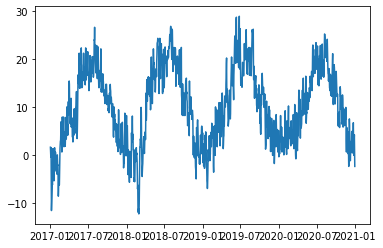

In [8]:
plt.plot(torun['date'],torun['Średnia temperatura dobowa'])
plt.show()

In [9]:
#wyroznienie tylko potrzebnych kolumn
dane = torun[['date','Maksymalna temperatura dobowa']] #wybor kolumn ktore nas interesuja
dane.dropna(inplace=True) #usuniecie brakujacych danych
dane.columns=['ds','y'] #zmienione nazwy kolumn, poniewaz NeuralProphet wymaga takiego nazewnictwa
dane.tail()

,ds,y
403158,2020-12-27,1.3
403159,2020-12-28,5.8
403160,2020-12-29,5.2
403161,2020-12-30,4.9
403162,2020-12-31,1.6


In [10]:
#stworzenie niewytrenowanej instancji NeuralProphet
model = NeuralProphet()
#proces uczenia, przesylamy nasze dane
metrics = model.fit(dane,freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 173


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.11E-01, min: 3.46E-01


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.47E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.02E-01
Epoch[173/173]: 100%|█| 173/173 [00:17<00:00,  9.93it/s, SmoothL1Loss=0.00555, MAE=3.12, RMSE=3.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


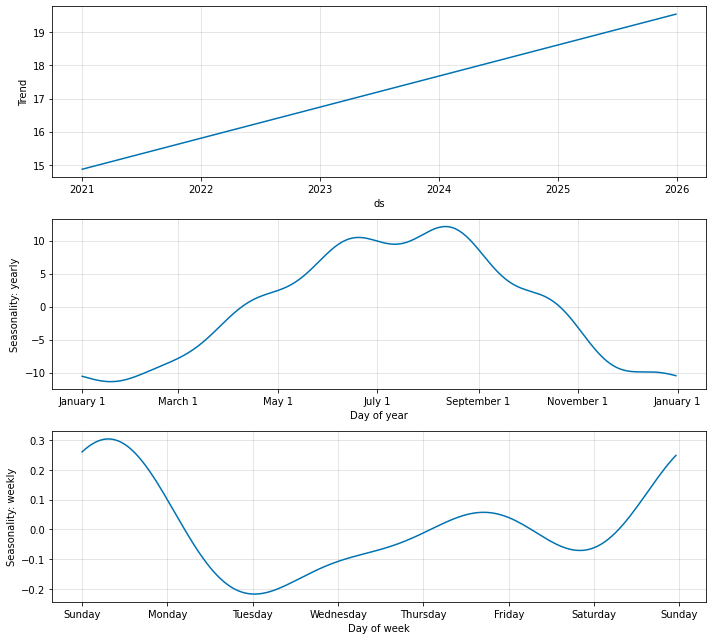

In [11]:
future = model.make_future_dataframe(df=dane, periods=1825) #1825 dni czyli 5 lat
forecast = model.predict(df=future)
components = model.plot_components(forecast)

In [12]:
forecast.tail()


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1820,2025-12-26,None,9.409634,NaN,19.538473,-10.168357,0.039518
1821,2025-12-27,None,9.258953,NaN,19.541040,-10.220296,-0.061791
1822,2025-12-28,None,9.528337,NaN,19.543610,-10.275994,0.260724
1823,2025-12-29,None,9.310324,NaN,19.546177,-10.335060,0.099206
1824,2025-12-30,None,8.933859,NaN,19.548746,-10.397054,-0.217834


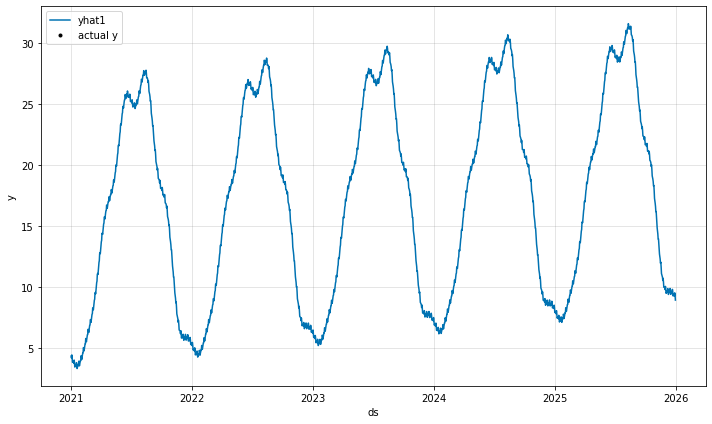

In [13]:
fig_forecast = model.plot(forecast)